<a href="https://colab.research.google.com/github/WardTurkyeh/ML-py/blob/main/knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [27]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [50]:
len(X_train)

1437

In [51]:
len(X_test)

360

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [54]:
knn.score(X_test,y_test)

0.9833333333333333

In [64]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [1,2,3,5,10,20,30]}, cv=5, return_train_score=False)
clf.fit(digits.data,digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00859566, 0.00764885, 0.00741382, 0.0077085 , 0.00732617,
        0.00753665, 0.00772548]),
 'mean_score_time': array([0.06715317, 0.07414975, 0.07199211, 0.07167487, 0.07449884,
        0.07736468, 0.07922664]),
 'mean_test_score': array([0.96439338, 0.96717115, 0.96606469, 0.96272826, 0.95494274,
        0.94992881, 0.94102445]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 5, 10, 20, 30],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 20},
  {'n_neighbors': 30}],
 'rank_test_score': array([3, 1, 2, 4, 5, 6, 7], dtype=int32),
 'split0_test_score': array([0.96111111, 0.96111111, 0.95555556, 0.94722222, 0.93055556,
        0.925     , 0.925     ]),
 'split1_test_score': array([0.95277778, 0.96666667, 0.95833333, 0.95555556, 0.94722222,
        

In [65]:
results = pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008596,0.001842,0.067153,0.001653,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.007649,0.000152,0.074150,0.006424,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.007414,0.000202,0.071992,0.003545,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.983287,0.966574,0.966065,0.009668,2
3,0.007709,0.000456,0.071675,0.001654,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,4
4,0.007326,0.000035,0.074499,0.003240,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,5


In [66]:
results[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.964393
1,2,0.967171
2,3,0.966065
3,5,0.962728
4,10,0.954943
5,20,0.949929
6,30,0.941024


In [67]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [68]:
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

Text(42.0, 0.5, 'Truth')

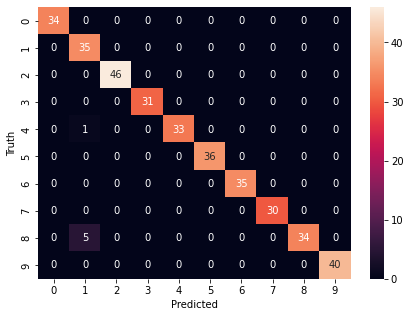

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.85      1.00      0.92        35
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        31
           4       1.00      0.97      0.99        34
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        30
           8       1.00      0.87      0.93        39
           9       1.00      1.00      1.00        40

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.99      0.98      0.98       360

